# _a_TLC

In [1]:
from atlc import *

## SQ limit

Shockley-Queisser limit (SQ limit)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 2000.0 nm
===
J_sc: 28.974 mA/cm^2
J0_rad: 6.03e-20 mA/cm^2
V_oc: 1.231 V
V_max, J_max: 1.133 V, 28.322 mA/cm^2
FF: 89.962%
Efficiency: 32.089%


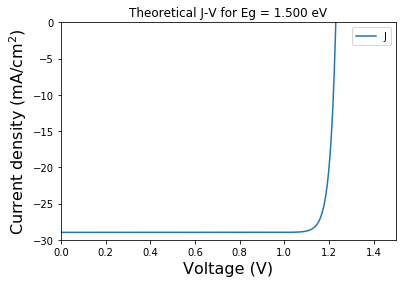

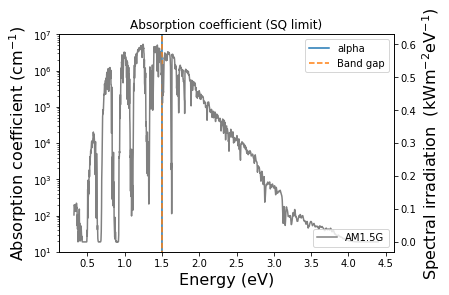

In [14]:
atlc_CZTS_sq = tlc(1.5, T=300, l_sq=True)
atlc_CZTS_sq.calculate_rad()

print(atlc_CZTS_sq)
atlc_CZTS_sq.plot_jv()
plt.ylim((-30, 0))
plt.savefig('jv_sq.pdf')
atlc_CZTS_sq.plot_alpha(l_plot_solar=True)

## Radiative limit (finite alpha)

Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 1000.0 nm
Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 1000.0 nm
===
J_sc: 25.053 mA/cm^2
J0_rad: 5.22e-20 mA/cm^2
V_oc: 1.231 V
V_max, J_max: 1.133 V, 24.489 mA/cm^2
FF: 89.962%
Efficiency: 27.746%


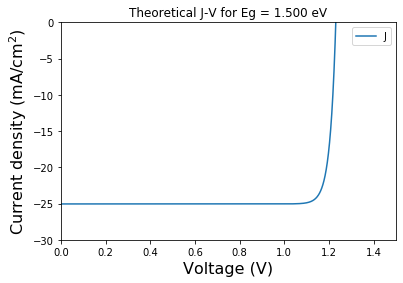

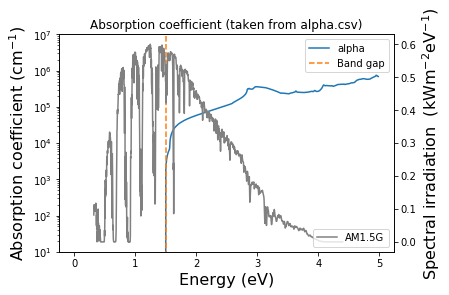

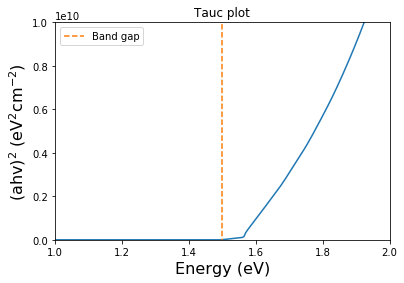

In [12]:
atlc_CZTS = tlc(1.5, T=300, thickness=1000)
print(atlc_CZTS)
# atlc_CZTS.calculate_SRH()
# Radiative limits
# reading "alpha.csv"
atlc_CZTS.calculate_rad()

print(atlc_CZTS)
atlc_CZTS.plot_jv()
plt.ylim((-30, 0))
plt.savefig('jv_rad.pdf')

atlc_CZTS.plot_alpha()
plt.savefig('alpha.pdf')
atlc_CZTS.plot_tauc()

## Trap limit conversion efficiency

Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 1000.0 nm
===
J_sc: 25.053 mA/cm^2
J0_rad: 5.22e-20 mA/cm^2
V_oc: 0.858 V
V_max, J_max: 0.769 V, 24.237 mA/cm^2
FF: 86.756%
Efficiency: 18.638%


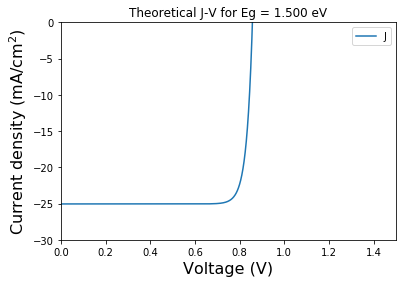

In [13]:
# atlc_CZTS.calculate_SRH()
# atlc_CZTS.calculate_rad()
# Radiative limits + nonradiative recombination
# reading "alpha.csv", "input-fermi.dat", "POSCAR", "totdos.dat", "trap.dat"
atlc_CZTS.calculate()

print(atlc_CZTS)
atlc_CZTS.plot_jv()
plt.ylim((-30, 0))
plt.savefig('jv_tlc.pdf')

## Thickness vs efficiency

In [5]:
eff_rad = []
eff_srh = []
thickness_list = range(1, 10*1000, 200)
atlc_list = []
for thickness in thickness_list:
    atlc_CZTS = tlc(1.5, T=300, thickness=thickness)
    atlc_list.append(atlc_CZTS)
    atlc_CZTS.calculate_rad()
    eff_rad.append(atlc_CZTS.efficiency*100)
    atlc_CZTS.calculate()    
    eff_srh.append(atlc_CZTS.efficiency*100)

Maximum efficiency at W = 2601 nm


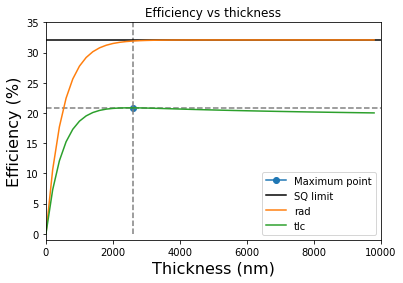

In [15]:
import numpy as np

indx = np.argmax(eff_srh)

plt.plot([thickness_list[indx]], [eff_srh[indx]],
         marker = 'o', label="Maximum point")
plt.plot([0, 1E10], [eff_srh[indx], eff_srh[indx]], c='gray', ls='--')
plt.plot([thickness_list[indx],thickness_list[indx]], [0, 100], c='gray', ls='--')
plt.plot([0, 1E100], [atlc_CZTS_sq.efficiency*100, atlc_CZTS_sq.efficiency*100], c='k', label='SQ limit')

print("Maximum efficiency at W =", thickness_list[indx], "nm")
plt.plot(thickness_list, eff_rad, label="rad")
plt.plot(thickness_list, eff_srh, label="tlc")
plt.xlabel("Thickness (nm)", fontsize=16)
plt.ylabel("Efficiency (%)", fontsize=16)
plt.title("Efficiency vs thickness")
plt.ylim((-1, 35))
plt.xlim((0, 1000*10))
plt.legend()
plt.savefig('eff_w.pdf')
plt.show()

In [7]:
atlc_CZTS = atlc_list[indx]
atlc_CZTS

Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 2601.0 nm
===
J_sc: 28.815 mA/cm^2
J0_rad: 6e-20 mA/cm^2
V_oc: 0.836 V
V_max, J_max: 0.749 V, 27.835 mA/cm^2
FF: 86.505%
Efficiency: 20.848%

_ab initio_ calculations to determine the optimal thickness of solar cells